#Análise descritiva

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("cars.csv", sep=",")
df.head()

,id,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,...,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,3,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,...,sedan,4,2,hybrid_gas_electric,6.0,37.8,42.1,35.8,34.7,4
1,6,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,16
2,7,Ford,Focus,2014,97027,27,37,159,146,2.0,...,sedan,4,2,gas,6.0,38.3,43.7,38.0,33.2,13
3,8,Honda,Civic,2016,95396,31,42,158,138,1.5,...,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,26
4,9,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     52 non-null     int64  
 1   brand                  52 non-null     object 
 2   model                  52 non-null     object 
 3   year                   52 non-null     int64  
 4   miles                  52 non-null     int64  
 5   city_mileage           52 non-null     int64  
 6   highway_mileage        52 non-null     int64  
 7   horsepower             52 non-null     int64  
 8   torque                 52 non-null     int64  
 9   engine_capacity_litre  52 non-null     float64
 10  fuel_capacity          52 non-null     float64
 11  num_cylinder           52 non-null     int64  
 12  num_seat               52 non-null     int64  
 13  num_owners             52 non-null     int64  
 14  price                  52 non-null     int64  
 15  link    

In [4]:
#somar valores nulos:
df.isnull().sum()

id                        0
brand                     0
model                     0
year                      0
miles                     0
city_mileage              0
highway_mileage           0
horsepower                0
torque                    0
engine_capacity_litre     0
fuel_capacity             0
num_cylinder              0
num_seat                  0
num_owners                0
price                     0
link                      0
condition                51
type                      0
doors                     0
wheel_drive               0
engine_type               0
speed_levels              1
front_headroom            0
front_legroom             0
rear_headroom             0
rear_legroom              0
service_records           0
dtype: int64

In [5]:
#dropar colunas com nulos e que não acho relevantes:
df_menor = df.drop(["condition", "speed_levels", "front_headroom", "front_legroom", "rear_headroom", "rear_legroom", "id", "city_mileage", "highway_mileage", "link"], axis=1)
df_menor.head()

,brand,model,year,miles,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,num_seat,num_owners,price,type,doors,wheel_drive,engine_type,service_records
0,Chevrolet,Volt LT,2019,27173,149,294,1.5,8.9,4,5,3,25655,sedan,4,2,hybrid_gas_electric,4
1,Hyundai,Elantra SE,2017,76941,146,132,2.0,14.0,4,5,2,15590,sedan,4,2,gas,16
2,Ford,Focus,2014,97027,159,146,2.0,12.4,4,5,3,13590,sedan,4,2,gas,13
3,Honda,Civic,2016,95396,158,138,1.5,12.4,4,5,2,20590,sedan,4,2,gas,26
4,Hyundai,Elantra SE,2019,28405,147,132,2.0,14.0,4,5,3,16787,sedan,4,2,gas,5


In [6]:
df_menor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  52 non-null     object 
 1   model                  52 non-null     object 
 2   year                   52 non-null     int64  
 3   miles                  52 non-null     int64  
 4   horsepower             52 non-null     int64  
 5   torque                 52 non-null     int64  
 6   engine_capacity_litre  52 non-null     float64
 7   fuel_capacity          52 non-null     float64
 8   num_cylinder           52 non-null     int64  
 9   num_seat               52 non-null     int64  
 10  num_owners             52 non-null     int64  
 11  price                  52 non-null     int64  
 12  type                   52 non-null     object 
 13  doors                  52 non-null     int64  
 14  wheel_drive            52 non-null     int64  
 15  engine_t

In [7]:
df_menor.describe().round(2)

,year,miles,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,num_seat,num_owners,price,doors,wheel_drive,service_records
count,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.0,52.00,52.00,52.0,52.00,52.00
mean,2018.67,33901.25,176.87,177.92,1.83,14.23,4.04,5.0,1.35,21763.42,4.0,2.15,7.33
std,1.40,22700.65,33.79,47.26,0.38,2.60,0.28,0.0,0.62,3532.46,0.0,0.54,4.71
min,2014.00,5000.00,143.00,99.00,1.40,7.00,4.00,5.0,1.00,13590.00,4.0,2.00,1.00
25%,2018.00,16454.75,152.00,138.00,1.50,12.40,4.00,5.0,1.00,19519.00,4.0,2.00,4.00
50%,2019.00,27448.50,159.50,181.00,2.00,13.60,4.00,5.0,1.00,21998.50,4.0,2.00,6.00
75%,2019.25,42442.00,192.00,192.00,2.00,15.05,4.00,5.0,2.00,22996.00,4.0,2.00,10.00
max,2022.00,97027.00,288.00,294.00,3.50,19.00,6.00,5.0,3.00,33777.00,4.0,4.00,26.00


**insights**: variação de núm de owners e num cylinder parece pequena, provavelmente algo q não importa tanto no preço, já q tds são quase iguais. Não há variação de num_seat e num_doors, então isso tb não influencia o preço. Ao criar um gráfico mais abaixo, percebi q o type de carro tb é único, só sedan, então não influencia tb.

In [8]:
#classificar carros por preço:

def categorizar_preco(price):
  if price <=18000:
    return "barato"
  elif price > 18000 and price <= 23000:
    return "preco_medio"
  else:
    return "caro"

In [9]:
#criar coluna no df com a categorização dos preços:

df_menor["categoria_preco"] = df_menor["price"].apply(categorizar_preco)
df_menor.head()

,brand,model,year,miles,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,num_seat,num_owners,price,type,doors,wheel_drive,engine_type,service_records,categoria_preco
0,Chevrolet,Volt LT,2019,27173,149,294,1.5,8.9,4,5,3,25655,sedan,4,2,hybrid_gas_electric,4,caro
1,Hyundai,Elantra SE,2017,76941,146,132,2.0,14.0,4,5,2,15590,sedan,4,2,gas,16,barato
2,Ford,Focus,2014,97027,159,146,2.0,12.4,4,5,3,13590,sedan,4,2,gas,13,barato
3,Honda,Civic,2016,95396,158,138,1.5,12.4,4,5,2,20590,sedan,4,2,gas,26,preco_medio
4,Hyundai,Elantra SE,2019,28405,147,132,2.0,14.0,4,5,3,16787,sedan,4,2,gas,5,barato


In [10]:
#quantos registros de cada marca:
df_menor.groupby("brand")["brand"].count()

brand
Chevrolet      3
Ford           5
Honda         23
Hyundai        7
Subaru         3
Volkswagen    11
Name: brand, dtype: int64

**insights**: Honda tem mto mais carros que todas as outras marcas. Será q criar um modelo é okay com esse número de linhas? Pode ser tendencioso?

In [11]:
#quantos registros de cada categoria de preço:
df_menor.groupby("categoria_preco")["categoria_preco"].count()

categoria_preco
barato          8
caro           12
preco_medio    32
Name: categoria_preco, dtype: int64

**insights**: temos mais carros de preço médio do que baratos e caros. Lembrando q as faixas de preço foram criadas por mim.

In [12]:
#média de milhas por marca

df_menor.groupby("brand")["miles"].mean()

brand
Chevrolet     24615.000000
Ford          46176.000000
Honda         40085.043478
Hyundai       28647.142857
Subaru        26465.333333
Volkswagen    23296.181818
Name: miles, dtype: float64

**insights**: Ford e Honda são os carros com mais milhas rodadas e com grande diferença das outras marcas.

In [13]:
#media de preço por marca

df_menor.groupby("brand")["price"].mean()

brand
Chevrolet     22724.666667
Ford          19773.800000
Honda         22576.565217
Hyundai       19985.000000
Subaru        26175.000000
Volkswagen    20634.000000
Name: price, dtype: float64

**insights**: Subaru tem os carros mais caros, seguida de Chevrolet.



In [14]:
df_menor.groupby("categoria_preco")["num_owners"].sum()

categoria_preco
barato         15
caro           14
preco_medio    41
Name: num_owners, dtype: int64

**insights**: Carros de preço médio tiveram mais owners que os baratos e caros. Isso talvez tb pq temos mais carros nessa faixa de preço.


In [15]:
df_menor.groupby("brand")["num_owners"].sum()

brand
Chevrolet      5
Ford           9
Honda         28
Hyundai       10
Subaru         4
Volkswagen    14
Name: num_owners, dtype: int64

#Gráficos

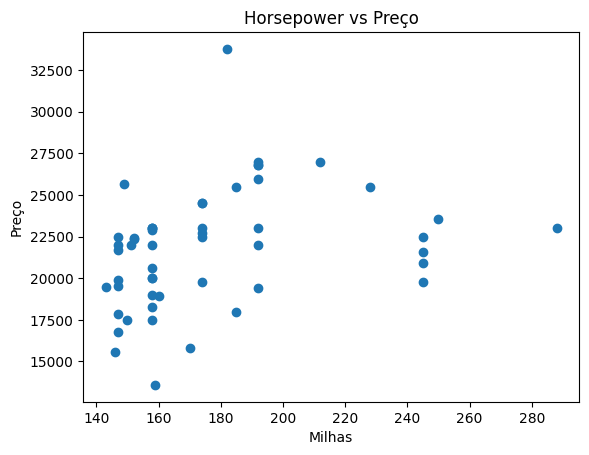

In [16]:
#plotar gráfico usando horsepower no eixo X e price no eixo Y:

plt.scatter(df_menor["horsepower"], df_menor["price"])
plt.xlabel("Milhas")
plt.ylabel("Preço")
plt.title("Horsepower vs Preço")
plt.show()

**insights**: aparentemente horsepower não influencia o preço.

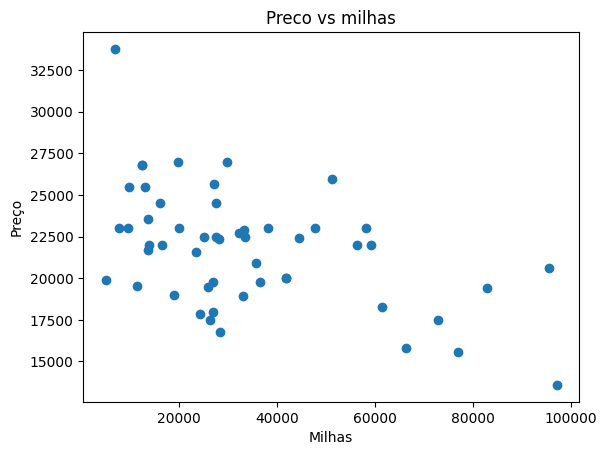

In [17]:
#plotar gráfico usando miles no eixo X e price no eixo Y:

plt.scatter(df_menor["miles"], df_menor["price"])
plt.xlabel("Milhas")
plt.ylabel("Preço")
plt.title("Preco vs milhas")
plt.show()

**insights**: qto menos milhas rodadas, mais caro é o carro. Há poucos carros vendidos com mais de 60000 milhas rodadas. Maior concentração de carros vendidos entre 10000 e 40000 milhas.

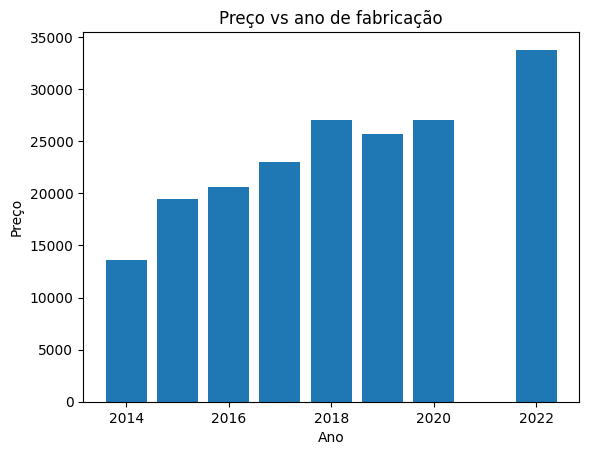

In [18]:
#plotar gráfico usando year no eixo X e price no eixo Y:

plt.bar(df_menor["year"], df_menor["price"])
plt.xlabel("Ano")
plt.ylabel("Preço")
plt.title("Preço vs ano de fabricação")
plt.show()

**insights**: carros mais novos são mais caros. Não há carros vendidos em 2021. Carros de 2018 parecem não seguir a regra, tem o msm valor de 2020.

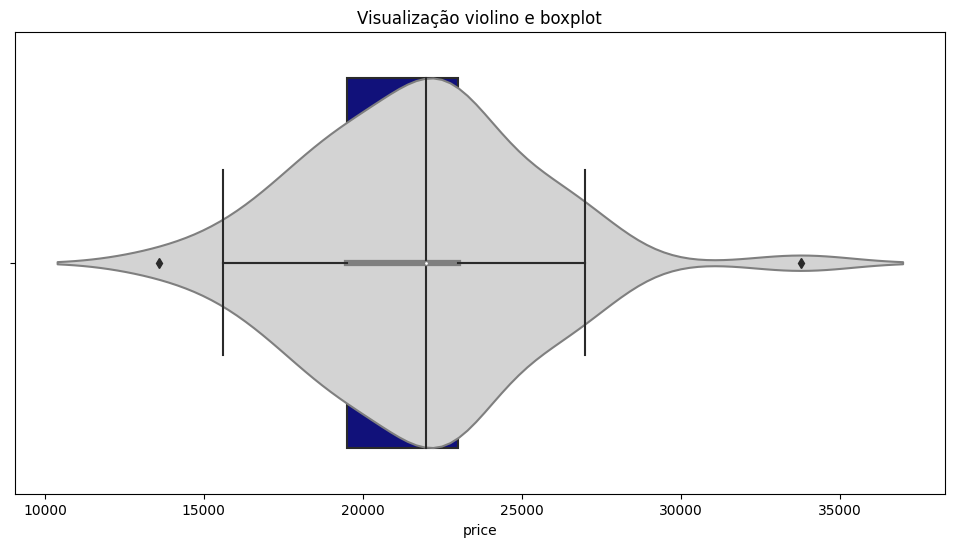

In [19]:
#juntar os gráficos boxplot e violin:

fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(x="price", data=df_menor, ax=ax, color="lightgray")
sns.boxplot(x="price", data=df_menor, ax=ax, whis=1.5, color="darkblue")
ax.set_title("Visualização violino e boxplot")
plt.show()

**insights**: tem poucos outliers, média por volta de 22000

<ipython-input-20-5501be3b8dc0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_menor.corr().round(2)


<Axes: >

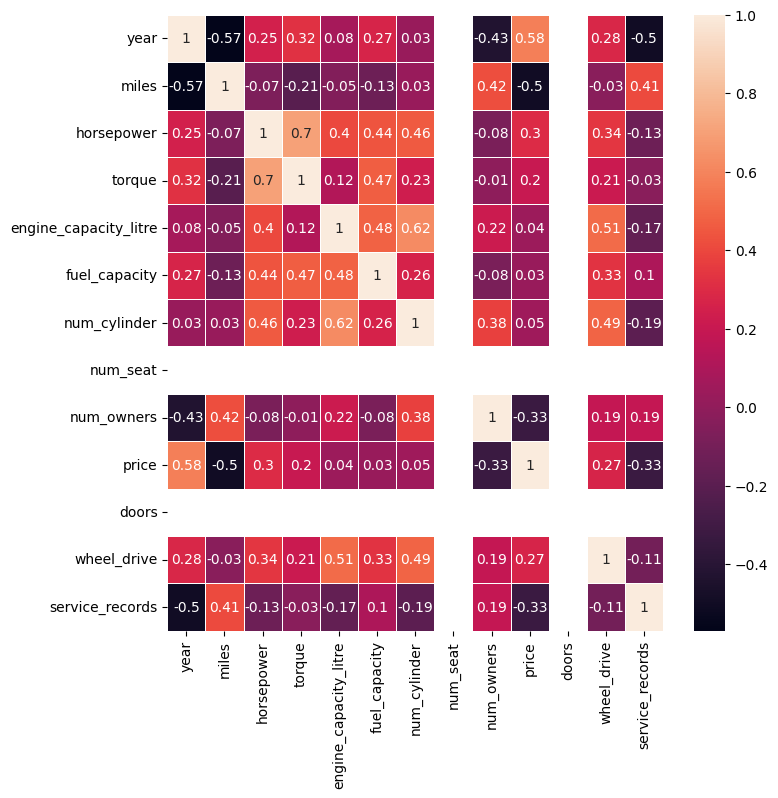

In [20]:
#matriz de correlação entre as variáveis:
correlation_matrix = df_menor.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

**insights**: variáveis interessantes pro modelo, considerando price como target - year, miles, horsepower, num_owners, service_records

Text(0.5, 1.0, '')

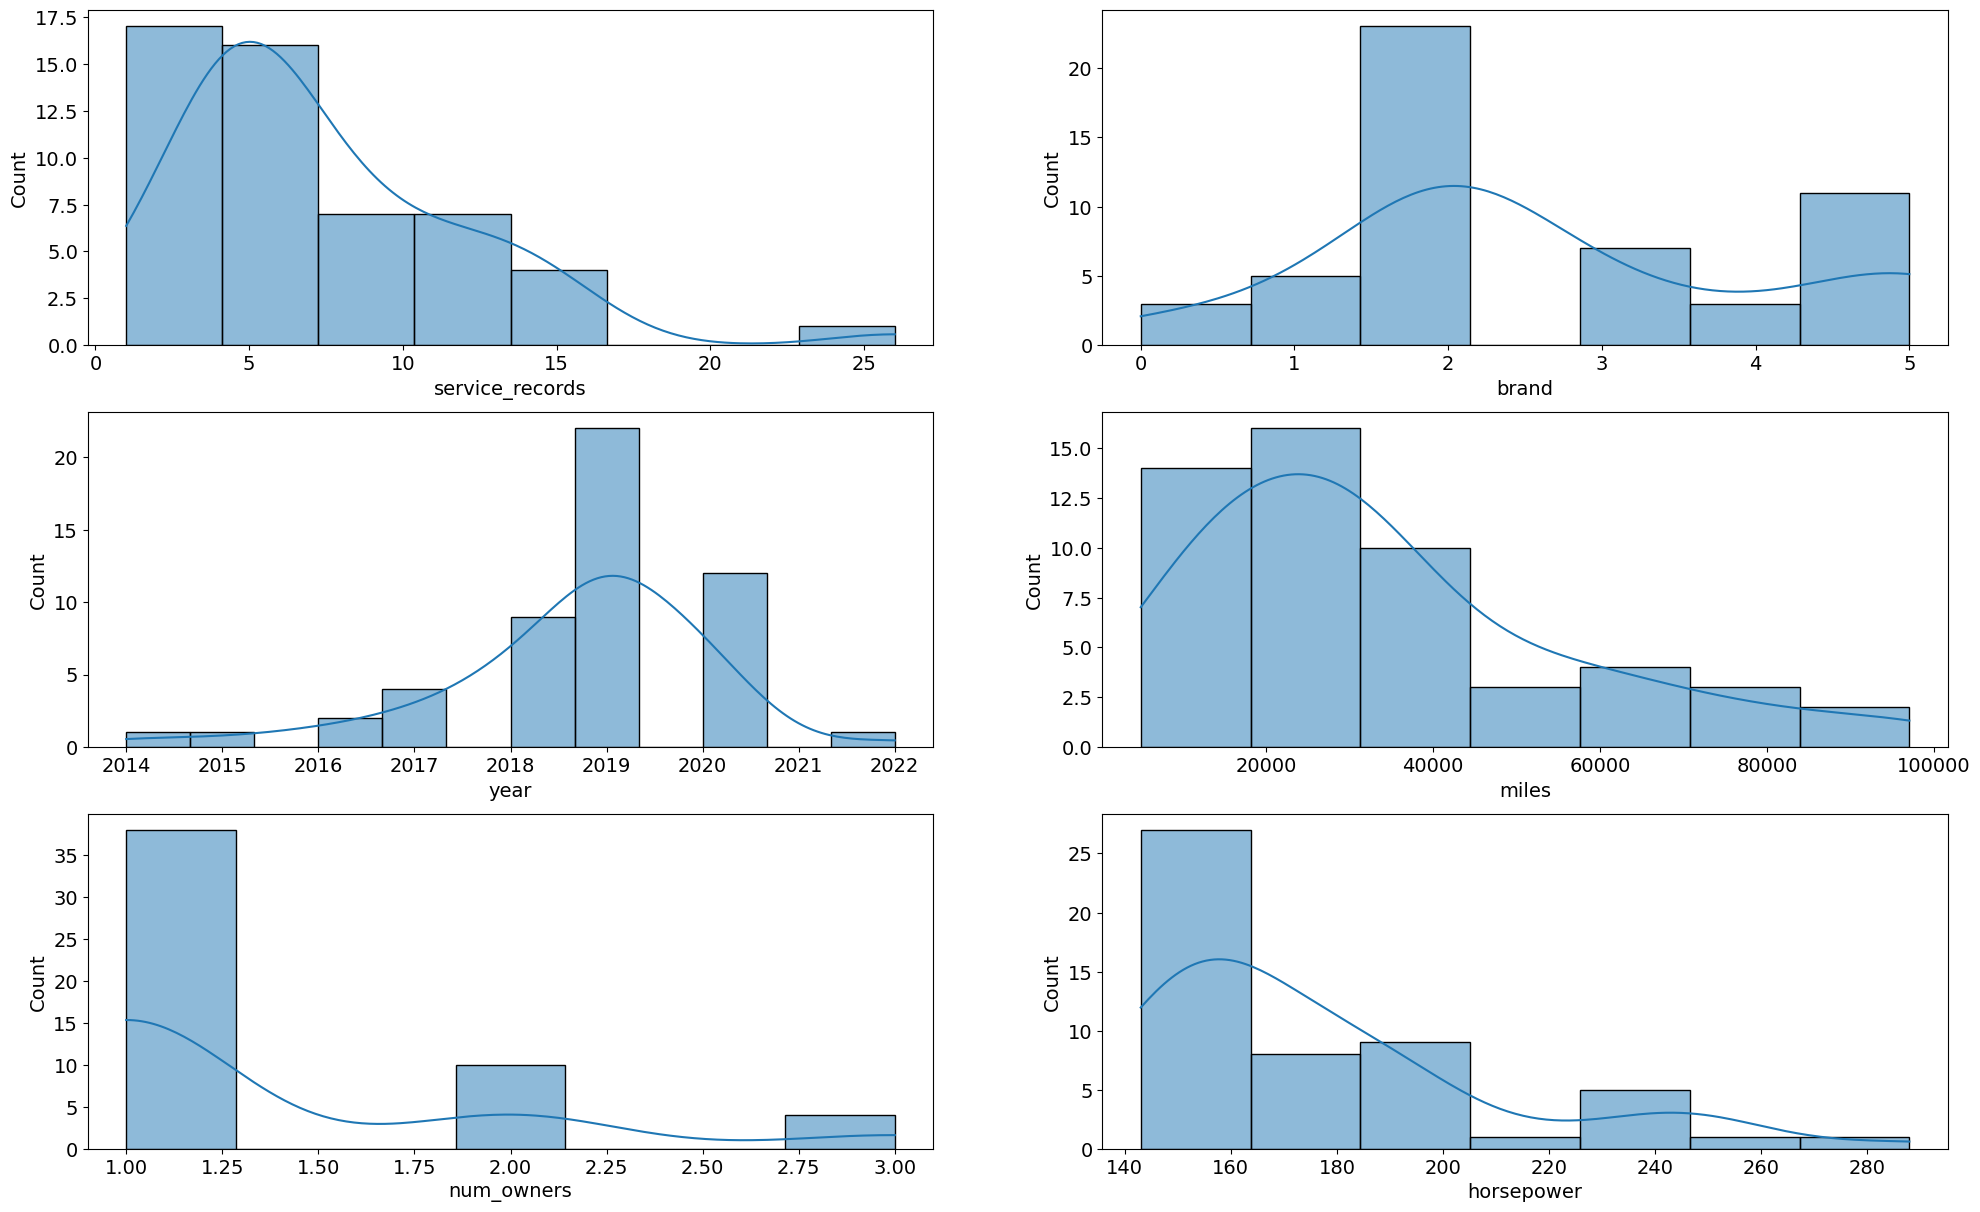

In [56]:
#explorar variáveis pra escolher pro modelo de regressão, criando histogramas pra analisar todas as variáveis de uma vez:

plt.figure(figsize=(24, 20))

plt.subplot(4, 2, 1)
fig = sns.histplot(data=df_menor, x="service_records", kde=True)
fig.set_title("")

plt.subplot(4, 2, 2)
fig = sns.histplot(data=df_menor, x="brand", kde=True)
fig.set_title("")

plt.subplot(4, 2, 3)
fig = sns.histplot(data=df_menor, x="year", kde=True)
fig.set_title("")

plt.subplot(4, 2, 4)
fig = sns.histplot(data=df_menor, x="miles", kde=True)
fig.set_title("")

plt.subplot(4, 2, 5)
fig = sns.histplot(data=df_menor, x="num_owners", kde=True)
fig.set_title("")

plt.subplot(4, 2, 6)
fig = sns.histplot(data=df_menor, x="horsepower", kde=True)
fig.set_title("")

**insights**: será q precisa normalizar as variáveis? Vou tentar aplicar os modelos sem normalização, se a acurácia for baixa tento normalizar

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
#pra conseguir usar as variáveis de texto brand e categoria_preco, fazer transformação de label encoding nos dados:
#pelo q entendi, vc cria um label numérico pra variaveis texto:

df_menor["brand"]=LabelEncoder().fit_transform(df_menor["brand"])
df_menor["categoria_preco"]=LabelEncoder().fit_transform(df_menor["categoria_preco"])

In [24]:
df_menor.head()

,brand,model,year,miles,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,num_seat,num_owners,price,type,doors,wheel_drive,engine_type,service_records,categoria_preco
0,0,Volt LT,2019,27173,149,294,1.5,8.9,4,5,3,25655,sedan,4,2,hybrid_gas_electric,4,1
1,3,Elantra SE,2017,76941,146,132,2.0,14.0,4,5,2,15590,sedan,4,2,gas,16,0
2,1,Focus,2014,97027,159,146,2.0,12.4,4,5,3,13590,sedan,4,2,gas,13,0
3,2,Civic,2016,95396,158,138,1.5,12.4,4,5,2,20590,sedan,4,2,gas,26,2
4,3,Elantra SE,2019,28405,147,132,2.0,14.0,4,5,3,16787,sedan,4,2,gas,5,0


**Legenda para as marcas:**


Chevrolet - 0      
Ford - 1    
Honda - 2      
Hyundai - 3       
Subaru - 4        
Volkswagen - 5


**Legenda das categorias:**

Barato - 0  caro - 1  preco_medio - 2

<ipython-input-25-7d00defe6a55>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_menor.corr().round(2)


<Axes: >

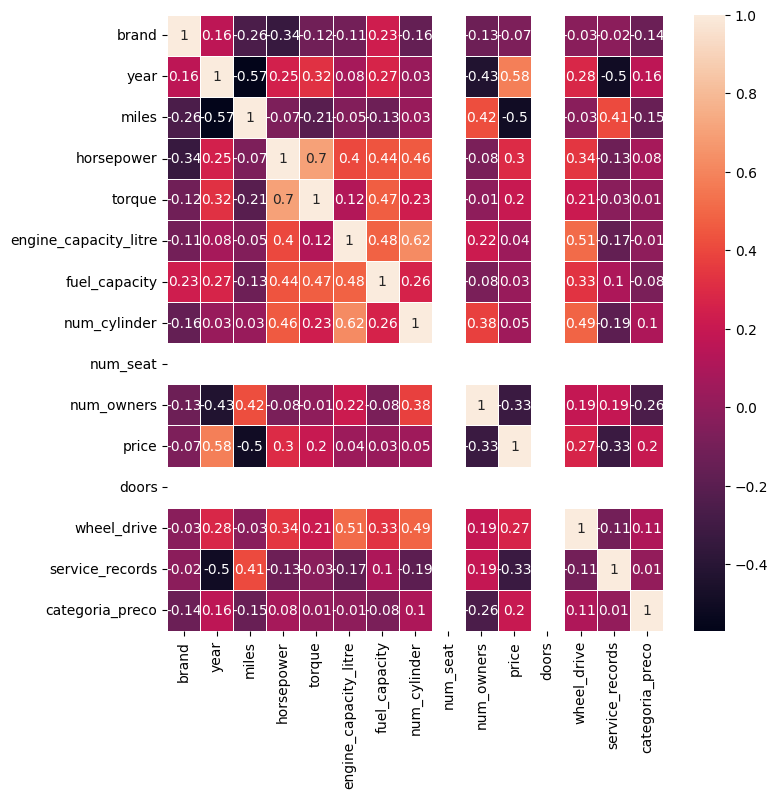

In [25]:
#correlação novamente após mudar as variáveis de texto:
correlation_matrix = df_menor.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

**insights**: não vi correlação relevante nas variáveis de texto transformadas.

#Modelos de ML

**Como estou tentando prever um preço com base em variáveis, não estou classificando as variáveis, vou tentar usar modelos de regressão.**

**MODELO DE REGRESSÃO LINEAR**

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#MODELO DE REGRESSÃO LINEAR sem normalização das variáveis (modelo de regressão linear não sofre influência da escala de dados)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [29]:
#separando variável dependente e independentes

x = df_menor[["brand", "year", "miles", "num_owners", "horsepower", "service_records"]]
y = df_menor["price"]

In [34]:
#criar base de treino e teste:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [35]:
#aplicar o modelo de ML:

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [36]:
#criar base de dados pra previsão:

y_pred = model.predict(x_test)

In [37]:
#métricas de validação do modelo, comparando a base de teste com a base de predição:

MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE: ", MAE)
print("R2: ", r2)

MAE:  1910.921834929788
R2:  0.20065423316143305


**insights**: acertos muuuuito baixos, kkrying

**MODELO DE REGRESSÃO LINEAR MÚLTIPLA**

In [38]:
#REGRESSÃO LINEAR MÚLTIPLA:

from sklearn.linear_model import LinearRegression

#Criando objeto de regressão linear:

lr = LinearRegression()

In [40]:
#treinando o modelo:

lr.fit(x_train, y_train)

LinearRegression()

In [41]:
#calculando o valor predito da variável resposta na amostra teste
y_pred = lr.predict(x_test)

In [42]:
#olhar o intercepto e os coeficientes de regressão
#representa o valor esperado da variável dependente qdo todas as variáveis independentes são iguais
#intercepto = ponto onde a linha de regressão cruza o eixo vertical (y)

print("Intercepto: ", lr.intercept_)

Intercepto:  -2414806.5004213876


In [44]:
#os coeficientes de regressão linear representam as inclinações da linha de regressão para cada variável

coefficients = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(np.transpose(lr.coef_))], axis=1)
coefficients

,0,0
0,brand,-605.314600
1,year,1208.111202
2,miles,-0.052166
3,num_owners,-231.133333
4,horsepower,3.982850
5,service_records,100.895216


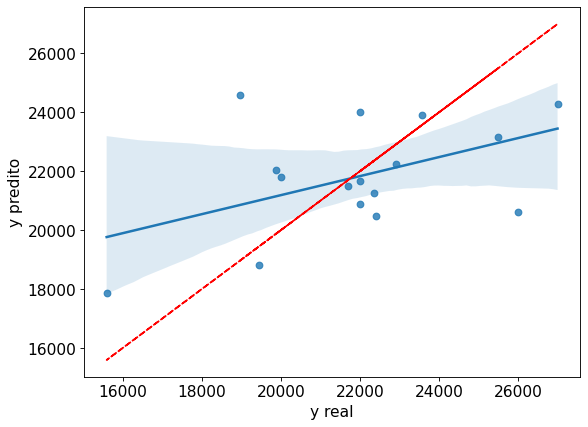

In [45]:
#visualizar acertos e erros em gráfico:

fig = plt.figure(figsize=(8, 6), dpi=80)
plt.rcParams.update({'font.size': 14})
ax = sns.regplot(x = y_test, y = y_pred)
ax.set(xlabel= 'y real', ylabel='y predito')
ax = plt.plot(y_test, y_test, '--r')
plt.show()

**insights**: reta vermelha são os preditos, linha azul é comportamento real

In [46]:
#avaliando o modelo:
#MAE: média do valor absoluto dos erros
#MSE: erro quadrático médio
#r2 = R quadrado

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE', MAE)
print('MSE', MSE)
print('R2', r2)

MAE 1910.921834929788
MSE 6096385.135354607
R2 0.20065423316143305


**insights**: deu o msm R2 do modelo de regressão linear comum, ainda baixo.

**MODELO TREE REGRESSOR**

In [47]:
#MODELO TREE REGRESSOR

from sklearn.tree import DecisionTreeRegressor

In [48]:
#criando o modelo do Tree Regressor
model_dtr = DecisionTreeRegressor(random_state=101, max_depth=10)
model_dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=101)

In [49]:
y_pred_model_dtr = model_dtr.predict(x_test)

In [50]:
#avaliando o modelo:

MAE = mean_absolute_error(y_test, y_pred_model_dtr)
MSE = mean_squared_error(y_test, y_pred_model_dtr)
r2 = r2_score(y_test, y_pred_model_dtr)

print('MAE', MAE)
print('MSE', MSE)
print('R2', r2)

MAE 2473.875
MSE 10415368.0
R2 -0.36564212004653873


**insights**: R2 negativo, acho que esse não deu certo (lembro que o Tree é usado pra maiores volumes de dados, talvez seja isso)

**MODELO SVR**

In [51]:
#MODELO SVR

from sklearn.svm import SVR

In [52]:
#criando modelo SVR

svr = SVR(kernel="linear")

In [53]:
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [54]:
y_pred_svr = svr.predict(x_test)

In [55]:
#avaliando o modelo:
MAE = mean_absolute_error(y_test, y_pred_svr)
MSE = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)

print('MAE', MAE)
print('MSE', MSE)
print('R2', r2)

MAE 2019.981199857736
MSE 6299234.727920802
R2 0.174057002257765


**insights**: SVR tem R2 um pouco menor que o de regressão normal e múltipla

**Como todos os modelos deram resultados baixos, vou mudar as variáveis e criar nova base de train_test, e fazer somente o modelo de regressão linear (já que todos deram resultados parecidos)**

In [57]:
x_new = df_menor[["brand", "year", "miles"]]
y_new = df_menor["price"]

In [58]:
#criar base de treino e teste:

x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, test_size=0.3, random_state=7)

In [59]:
#aplicar o modelo de ML:

model = LinearRegression()

model.fit(x_new_train, y_new_train)

LinearRegression()

In [60]:
#criar base de dados pra previsão:

y_pred = model.predict(x_new_test)

In [61]:
#métricas de validação do modelo, comparando a base de teste com a base de predição:

MAE = mean_absolute_error(y_new_test, y_pred)
r2 = r2_score(y_new_test, y_pred)

print("MAE: ", MAE)
print("R2: ", r2)

MAE:  1788.6168804313347
R2:  0.27676485545316365


**insights**: melhorou o resultado em relação às outras variáveis, mas ainda assim o índice está baixo.

**Como o índice ainda está baixo, vou tentar normalizar as variáveis pra ver se tem alguma diferença**

In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [63]:
#normalizando o primeiro X, que tem mais variáveis:

scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [64]:
#transformar x train e x test e salvar em novas variáveis (pra poder comparar depois as normalizadas e não normalizadas)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [65]:
model = LinearRegression()

model.fit(x_train_scaled, y_train)

LinearRegression()

In [66]:
y_pred = model.predict(x_test_scaled)

In [67]:
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE: ", MAE)
print("R2: ", r2)

MAE:  1910.9218349295525
R2:  0.20065423316155162


**insights**: não há diferença no índice pra variáveis normalizadas ou não.

**Como não houve diferença na normalização, vou tentar trocar novamente as variáveis e escolher somente brand e year, que tem uma distribuição mais parecida com price nos histogramas.**

In [68]:
x_nova = df_menor[["brand", "year"]]
y_nova = df_menor["price"]

In [69]:
x_nova_train, x_nova_test, y_nova_train, y_nova_test = train_test_split(x_nova, y_nova, test_size=0.3, random_state=7)

In [70]:
model = LinearRegression()

model.fit(x_nova_train, y_nova_train)

LinearRegression()

In [71]:
y_pred = model.predict(x_nova_test)

In [72]:
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE: ", MAE)
print("R2: ", r2)

MAE:  2139.248291640368
R2:  0.12126890429050052


**insights**: com somente 2 variáveis o resultado foi ainda mais baixo